In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

!wget https://www.essentiallysports.com/wp-content/uploads/IMG_20200131_151920.jpg -O input.jpg
!wget https://cdn.soccerladuma.co.za/cms2/image_manager/uploads/News/664586/7/default.jpg -O input2.jpg

--2020-03-12 12:57:51--  https://www.essentiallysports.com/wp-content/uploads/IMG_20200131_151920.jpg
Resolving www.essentiallysports.com (www.essentiallysports.com)... 13.35.118.78, 13.35.118.103, 13.35.118.20, ...
Connecting to www.essentiallysports.com (www.essentiallysports.com)|13.35.118.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26406 (26K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  25.79K  --.-KB/s    in 0.01s   

2020-03-12 12:57:52 (1.84 MB/s) - ‘input.jpg’ saved [26406/26406]

--2020-03-12 12:57:55--  https://cdn.soccerladuma.co.za/cms2/image_manager/uploads/News/664586/7/default.jpg
Resolving cdn.soccerladuma.co.za (cdn.soccerladuma.co.za)... 13.33.58.102, 2600:9000:20bf:c400:d:678c:1e89:c2e1, 2600:9000:20bf:6e00:d:678c:1e89:c2e1, ...
Connecting to cdn.soccerladuma.co.za (cdn.soccerladuma.co.za)|13.33.58.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53775 (53K) [image/

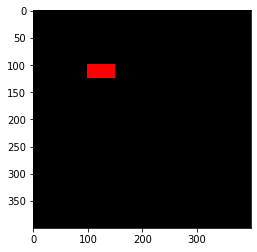

In [3]:
def draw_square():
  mat = np.zeros([400, 400, 3], dtype=np.uint8)
  for i in range(100, 125):
    for j in range(100, 150):
        mat[i][j][0] = 255
        
  plt.imshow(mat)
  
draw_square()

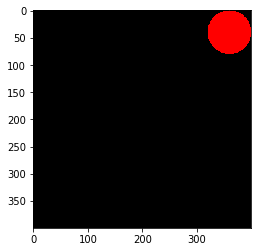

In [98]:
def draw_circle(color, x, y, mat=np.zeros([400, 400, 3], dtype=np.uint8)):
  r = 40
  for ii in range(-r, r):
    for jj in range(-r, r):
      if ii**2 + jj**2 <= r**2:
        mat[ii+x][jj+y][color] = 255
  plt.imshow(mat)

draw_circle(0, 40, 360, mat)

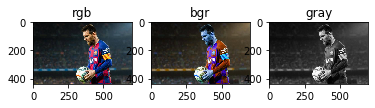

In [96]:
def show_messi():
  messi = plt.imread("./input.jpg")
  plt.figure()

  plt.subplot(1, 3, 1)
  plt.imshow(messi)
  plt.title("rgb")

  plt.subplot(1, 3, 2)
  plt.imshow(np.flip(messi, 2))
  plt.title("bgr")

  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(messi, cv2.COLOR_RGB2GRAY), cmap='gray')
  plt.title("gray")

show_messi()

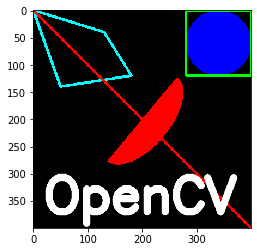

In [84]:
def draw_shapes_board():
  mat = np.zeros([400, 400, 3], dtype=np.uint8)
  
  # Draw blue circle
  r = 60
  circle_center_coordinates = (340, 60)
  mat = cv2.circle(mat, circle_center_coordinates, r, [0, 0, 255], -1)
  
  # Draw green square
  start_square_coordinates = (280, 120)
  end_square_coordinates = (400, 0)
  mat = cv2.rectangle(mat, start_square_coordinates,
                      end_square_coordinates, [0, 255, 0], 3)

  # Draw polygon
  points = np.array([[0, 0], [130, 40], [180, 120], [50, 140]], np.int32)
  mat = cv2.polylines(mat, [points], True, (0, 255, 255), 4)

  # Draw a line
  mat = cv2.line(mat, (0, 0), (400, 400), 255, 4)

  # Draw half ellipse
  ellipse_center_coordinates = (200, 200)
  ellipse_axis_lengthes = (100, 50) 
  mat = cv2.ellipse(mat, ellipse_center_coordinates,
                    ellipse_axis_lengthes, 130, 360, 180, 255, -1)

  # Draw text
  font = cv2.FONT_HERSHEY_SIMPLEX
  text_coordinates = (20, 370)
  mat = cv2.putText(mat, 'OpenCV', text_coordinates, font,
                    3, (255,255,255), 12, cv2.LINE_AA)
  plt.imshow(mat)

draw_shapes_board()


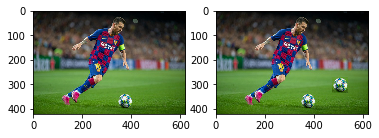

In [8]:
def copy_ball():
  messi = plt.imread("./input2.jpg")
  plt.subplot(1, 2, 1)
  plt.imshow(messi)

  copy_messi = messi.copy()
  for ii in range(270, 335):
    for jj in range(470, 535):
      copy_messi[ii][jj] = messi[ii + 65][jj - 130]

  plt.subplot(1, 2, 2)
  plt.imshow(copy_messi)
  
  
copy_ball()